Student Name: Eliana Kariuki
Student Pace: DSF-FT12-Hybrid
Instructor Name: Samuel Karu

In [7]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
movie_df = pd.read_csv(r'C:\Users\HomePC\Documents\labs\Statistics\box-office-movie-insights\zippedData\bom.movie_gross.csv\bom.movie_gross.csv')
movie_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [9]:
# Display the first few rows of the DataFrame  
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
# Display the column names of the DataFrame
movie_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [11]:
# Display the shape of the DataFrame
movie_df.shape

(3387, 5)

In [12]:
# Display the number of missing values in each column
movie_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
# Display the statistical summary information of the DataFrame
movie_df.describe() 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


The dataset contains information about box office movie insights. It includes 3,387 rows and 5 columns, with each row representing a movie. The columns provide the following details:

1. **Shape**
    - The DataFrame has 3,387 rows
    - Each row represents a movie, and the columns

2. **Columns**:
    - `title`: The title of the movie (string).
    - `studio`: The studio that produced the movie (string, with some missing values).
    - `domestic_gross`: The domestic box office gross revenue (float, with some missing values).
    - `foreign_gross`: The foreign box office gross revenue (string, with many missing values).
    - `year`: The year the movie was released (integer).

3. **Data Types**:
    - The `domestic_gross` column is a float, while `foreign_gross` is a string (likely due to inconsistent formatting or missing values).
    - The `title`, `studio`, and `year` columns are of type object (string) and integer, respectively.

4. **Missing Values**:
    - The `studio` column has 5 missing values.
    - The `domestic_gross` column has 28 missing values.
    - `foreign_gross`: The foreign box office gross revenue
    - The `domestic_gross` column has 28 missing values.


we will then connect to the BOM IMDB data base to extract tables 

- Load the BOM movie gross data from the  CSV file.
- Connect to the IMDb database and load the tables:

  - `movie_basics`: Basic movie information.
  - `writers`: Writer information linked to movies.
  - `movie_ratings`: Movie ratings and vote counts..
  - `persons`: Names and details of people (directors, writers, etc.).
  - `directors`: Director information linked to movies
Preview the datasets to understand their structure before merging and analysis.

In [16]:
import pandas as pd
import sqlite3

# Load BOM dataset
box_df = pd.read_csv(r'C:\Users\HomePC\Documents\labs\Statistics\box-office-movie-insights\zippedData\bom.movie_gross.csv\bom.movie_gross.csv')

# Connect to IMDB SQLite database
conn = sqlite3.connect(r'C:\Users\HomePC\Documents\labs\Statistics\box-office-movie-insights\zippedData\im.db\im.db')

In [17]:
# Query to get the list of all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Print the table names
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [18]:
# Load key tables
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
directors = pd.read_sql_query("SELECT * FROM directors", conn)
writers = pd.read_sql_query("SELECT * FROM writers", conn)
persons = pd.read_sql_query("SELECT * FROM persons", conn)

In [28]:
#preview the first few rows of each table
print(movie_basics.head(10)), "\n"
print(movie_ratings.head(10)), "\n"
print(directors.head(10)), "\n"
print(writers.head(10)), "\n"
print(persons.head(10)), "\n"


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   
6  tt0112502                          Bigfoot                     Bigfoot   
7  tt0137204                  Joe Finds Grace             Joe Finds Grace   
8  tt0139613                       O Silêncio                  O Silêncio   
9  tt0144449            Nema aviona za Zagreb       Nema aviona za Zagreb   

   start_year  runtime_minutes                      genres  
0        2013            175.0          Action,Crime,Drama  
1        2019            114.0

(None, '\n')

### Dropping Duplicates

To ensure data consistency and avoid redundancy, we will drop all duplicate rows from the datasets. This process will be applied to each DataFrame individually. The `drop_duplicates()` method in pandas will be used for this purpose. This method removes duplicate rows based on all columns by default, ensuring that only unique rows remain in the DataFrame.

Steps:
1. Identify and remove duplicate rows in each DataFrame (`box_df`, `movie_basics`, `movie_ratings`, `directors`, `writers`, `persons`).
2. Verify the changes by checking the shape of the DataFrames before and after removing duplicates.

This step is crucial for maintaining the integrity of the data and ensuring accurate analysis.

In [39]:
# Check and drop duplicates in each DataFrame
datasets = {
    "box_df": box_df,
    "movie_basics": movie_basics,
    "movie_ratings": movie_ratings,
    "directors": directors,
    "writers": writers,
    "persons": persons
}

for name, df in datasets.items():
    print(f"Checking duplicates in {name}: {df.duplicated().sum()} duplicates found.")
    datasets[name] = df.drop_duplicates()
    print(f"After dropping duplicates, {name} has shape: {datasets[name].shape}")

Checking duplicates in box_df: 0 duplicates found.
After dropping duplicates, box_df has shape: (3387, 5)
Checking duplicates in movie_basics: 0 duplicates found.
After dropping duplicates, movie_basics has shape: (146144, 6)
Checking duplicates in movie_ratings: 0 duplicates found.
After dropping duplicates, movie_ratings has shape: (73856, 3)
Checking duplicates in directors: 127639 duplicates found.
After dropping duplicates, directors has shape: (163535, 2)
Checking duplicates in writers: 77521 duplicates found.
After dropping duplicates, writers has shape: (178352, 2)
Checking duplicates in persons: 0 duplicates found.
After dropping duplicates, persons has shape: (606648, 5)


### Handling Missing Values

Missing values can significantly impact data analysis and modeling. To address this issue, we will detect and handle missing values in the datasets. The following steps will be taken:

1. **Detect Missing Values**:
    - Use the `isnull()` method to identify missing values in each column of the DataFrame.
    - Use the `sum()` method to count the total number of missing values in each column.

2. **Handle Missing Values**:
    - **Filling Missing Values**:
      - For numerical columns, missing values can be filled with the mean, median, or a specific value.
      - For categorical columns, missing values can be filled with the mode or a placeholder value.
    - **Dropping Missing Values**:
      - Rows or columns with a significant number of missing values can be dropped if they are not critical for analysis.

3. **Implementation**:
    - Analyze the percentage of missing values in each column to decide whether to fill or drop them.
    - Apply the appropriate method to handle missing values based on the context of the data.

This process ensures that the dataset is clean and ready for further analysis or modeling.

In [40]:
#display the number of missing values in each table
print(movie_basics.isnull().sum()), "\n"
print(movie_ratings.isnull().sum()), "\n"
print(directors.isnull().sum()), "\n"
print(writers.isnull().sum()), "\n"
print(persons.isnull().sum()), "\n"

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64
movie_id     0
person_id    0
dtype: int64
movie_id     0
person_id    0
dtype: int64
person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


(None, '\n')

In [51]:
# Updated function to handle missing values and duplicates
def filling_missing(df):
    # Dropping duplicate rows
    df = df.drop_duplicates()

    # Dropping columns with more than 50% missing values
    df = df.dropna(thresh=0.3 * len(df), axis=1)


    # Filling missing values in numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isna().sum() > 0:
            skewness = df[col].skew()
            fill_value = df[col].mean() if abs(skewness) < 0.5 else df[col].median()
            df[col].fillna(fill_value, inplace=True)
    
    # Filling missing values in categorical columns
    for col in df.select_dtypes(exclude=['number']).columns:
        if df[col].isna().sum() > 0:
            most_frequent = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            df[col].fillna(most_frequent, inplace=True)

    return df
# Apply filling_missing function to all DataFrames

box_df = filling_missing(box_df)
movie_basics = filling_missing(movie_basics)
movie_ratings = filling_missing(movie_ratings)
directors = filling_missing(directors)
writers = filling_missing(writers)
persons = filling_missing(persons)

# Convert gross columns to numeric
box_df['domestic_gross'] = pd.to_numeric(box_df['domestic_gross'], errors='coerce')
box_df['foreign_gross'] = pd.to_numeric(box_df['foreign_gross'], errors='coerce')


In [ ]:
# check for missing values and duplicates after cleaning
def check_duplicates_missing(df, name):
    print(f"--- {name} ---")
    print(f"Missing Values:\n{df.isnull().sum()}\n")
    print(f"Percentage of Missing Values:\n{(df.isnull().mean() * 100).round(2)}%\n")
    print(f"Number of Duplicates: {df.duplicated().sum()}\n")

# Apply the function to all datasets
for name, df in datasets.items():
    check_duplicates_missing(df, name)

--- box_df ---
Missing Values:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Percentage of Missing Values:
title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64%

Number of Duplicates: 0

--- movie_basics ---
Missing Values:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Percentage of Missing Values:
movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64%

Number of Duplicates: 0

--- movie_ratings ---
Missing Values:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

Percentage of Missing Values:
movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64%

Number of Duplicates: 0

--- directors ---
Missing Values:
movie_id

#### Removing outliers from the dataset in using IQR
The function `remove_outliers()` has been applied to remove outliers from the relevant columns in each DataFrame using the IQR method.


In [56]:
def remove_outliers(df, columns):
    for col in columns:
        if col in df.select_dtypes(include=['number']).columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])
box_df = remove_outliers(box_df, ['domestic_gross', 'foreign_gross'])
movie_basics = remove_outliers(movie_basics, ['runtime_minutes'])
movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])

### Merging Datasets

Merging datasets is a crucial step in data analysis, especially when working with multiple related tables. It allows us to combine information from different sources into a single DataFrame for comprehensive analysis. In this project, we will merge the datasets based on common keys to create a unified dataset.

#### Steps for Merging:
1. **Identify Common Keys**:
    - Determine the columns that serve as primary and foreign keys between the datasets. For example:
      - `movie_id` is a common key between `movie_basics`, `movie_ratings`, `directors`, and `writers`.
      - `person_id` is a common key between `directors`, `writers`, and `persons`.

2. **Choose Merge Type**:
    - Decide on the type of merge based on the analysis requirements:
      - `inner`: Includes only matching rows from both datasets.
      - `outer`: Includes all rows from both datasets, filling missing values with `NaN`.
      - `left`: Includes all rows from the left dataset and matching rows from the right dataset.
      - `right`: Includes all rows from the right dataset and matching rows from the left dataset.

3. **Perform the Merge**:
    - Use the `merge()` function in pandas to combine the datasets.

4. **Verify the Result**:
    - Check the shape and content of the merged dataset to ensure correctness.
    - Handle any missing values or duplicates that may arise after merging.

By merging the datasets, we can create a comprehensive dataset that combines movie details, ratings, directors, writers, and other relevant information for further analysis.

In [63]:
# Merge datasets
# Merge BOM DataFrame with Movie Basics DataFrame based on title and primary_title
merged_df = pd.merge(box_df, movie_basics, left_on='title', right_on='primary_title', how='inner')

# merging with movie_ratings
final_df = pd.merge(merged_df, movie_ratings, on='movie_id', how='inner')

# Merging with directors
final_df = pd.merge(final_df, directors, on='movie_id', how='left')

# Merging with writers
final_df = pd.merge(final_df, writers, on='movie_id', how='left')

# Drop duplicates
final_df = final_df.drop_duplicates(subset=['movie_id'])

# Fill missing values
final_df.fillna('Unknown', inplace=True)

# Final check
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 622
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            207 non-null    object 
 1   studio           207 non-null    object 
 2   domestic_gross   207 non-null    float64
 3   foreign_gross    207 non-null    float64
 4   year             207 non-null    int64  
 5   movie_id         207 non-null    object 
 6   primary_title    207 non-null    object 
 7   original_title   207 non-null    object 
 8   start_year       207 non-null    int64  
 9   runtime_minutes  207 non-null    float64
 10  genres           207 non-null    object 
 11  averagerating    207 non-null    float64
 12  numvotes         207 non-null    int64  
 13  person_id_x      207 non-null    object 
 14  person_id_y      207 non-null    object 
dtypes: float64(4), int64(3), object(8)
memory usage: 25.9+ KB


In [ ]:
Here are two hypothesis tests you can perform on this dataset:


2. **Test for Difference in Domestic Gross Revenue by Genre**:
    - **Hypothesis**:
      - Null Hypothesis (\(H_0\)): The mean domestic gross revenue is the same across different genres.
      - Alternative Hypothesis (\(H_a\)): The mean domestic gross revenue differs across genres.
    - **Test**: Perform a one-way ANOVA test to compare the mean `domestic_gross` across different genres.

In [ ]:
In place of the Pearson correlation test, you can use the **Spearman rank correlation test** or the **Kendall rank correlation test**, depending on the nature of your data:

1. **Spearman Rank Correlation**:
    - Use this if your data is not normally distributed or if the relationship between variables is monotonic (not necessarily linear).
    - It measures the strength and direction of the association between two ranked variables.

    ```python
    # Perform Spearman correlation test
    correlation, p_value = stats.spearmanr(df['runtime_minutes'], df['averagerating'])
    print(f"Spearman Correlation Coefficient: {correlation}")
    print(f"P-value: {p_value}")
    ```

2. **Kendall Rank Correlation**:
    - Use this for smaller datasets or when you want to measure the ordinal association between two variables.
    - It is less sensitive to outliers compared to Pearson and Spearman.

    ```python
    # Perform Kendall correlation test
    correlation, p_value = stats.kendalltau(df['runtime_minutes'], df['averagerating'])
    print(f"Kendall Correlation Coefficient: {correlation}")
    print(f"P-value: {p_value}")
    ```

Both tests are non-parametric and do not assume a linear relationship or normal distribution.

Pearson Correlation Coefficient: -0.1264855169346426
P-value: 0.06935645990839254
Fail to reject the null hypothesis: No significant relationship between runtime and average rating.


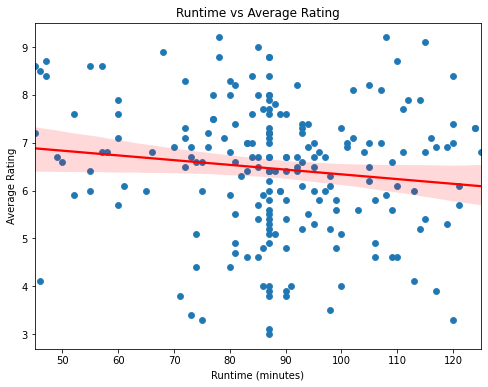

In [66]:
#perfoming a null hypothesis test to check the relationship between runtime and average rating
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform Pearson correlation test
def test_runtime_rating_correlation(df):
    correlation, p_value = stats.pearsonr(df['runtime_minutes'], df['averagerating'])
    print(f"Pearson Correlation Coefficient: {correlation}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant relationship between runtime and average rating.")
    else:
        print("Fail to reject the null hypothesis: No significant relationship between runtime and average rating.")

    # Plotting the relationship
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='runtime_minutes', y='averagerating', data=df)
    sns.regplot(x='runtime_minutes', y='averagerating', data=df, line_kws={"color": "red"})
    plt.title('Runtime vs Average Rating')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Average Rating')
    plt.show()

# Apply the function to the final_df
test_runtime_rating_correlation(final_df)

In [ ]:

# **Test for Difference in Domestic Gross Revenue by Genre**:
 #   - **Hypothesis**:
  #    - Null Hypothesis (\(H_0\)): The mean domestic gross revenue is the same across different genres.
   #   - Alternative Hypothesis (\(H_a\)): The mean domestic gross revenue differs across genres.
    #- **Test**: Perform a one-way ANOVA test to compare the mean `domestic_gross` across different genres.